# Day 0: Chaos, alfajores, and the start of an epic journey to Antarctica

My Antartica adventure began, not with a gentle glide into tranquility, but with a chaotic sprint into the heart of city life in Buenos Aires and Montevideo! This leg of the trip was sometimes bumpy, always exciting, from the tornado-threatened departure in San Francisco to the moment I finally stepped aboard the majestic Oosterdam. Ultimate destination: Antarctica, Patagonia, and the Chilean fjords.

In [ ]:
#@title Installation and setup
!pip install --quiet geopy meteostat

import requests
from google.colab import userdata
from datetime import datetime
import pandas as pd
import numpy as np
from meteostat import Point, Daily

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import folium  # For interactive maps
from folium import PolyLine # PolyLine is directly importable from folium
from folium.plugins import MarkerCluster
from geopy.distance import geodesic
from geopy.geocoders import Nominatim
import matplotlib.pyplot as plt

In [ ]:
#@title Timeline
import calendar
import datetime

def create_december_2024_calendar():
    """Creates a formatted calendar for December 2024 with specific dates filled in."""

    # --- Styling ---
    header_color = "\033[1;38;5;117m"   # Bold Light Purple
    weekday_color = "\033[38;5;253m"    # Very Light Gray (almost white)
    weekend_color = "\033[38;5;244m"    # Medium Light Gray
    filled_date_color = "\033[1;38;5;120;48;5;236m"  # Bold Green on Dark Gray background
    other_month_color = "\033[38;5;238m" # Darker Gray for days not in December
    reset_color = "\033[0m"          # Reset color

    # --- Filled Dates ---
    filled_dates = [14, 15, 16, 17, 18, 19]

    # --- Calendar Creation ---
    cal = calendar.Calendar(firstweekday=6)  # Start week on Sunday
    dec_2024 = cal.monthdatescalendar(2024, 12)

    # --- Header ---
    print(f"{header_color}       .: DECEMBER 2024 :.{reset_color}")
    print(f"{weekday_color}  Su  Mo  Tu  We  Th  Fr  Sa {reset_color}")  # Added extra spaces

    # --- Calendar Body ---
    for week in dec_2024:
        week_str = ""
        for date in week:
            day = date.day
            if date.month != 12:
                # Dates outside of December in darker gray
                week_str += f"{other_month_color} {day:2} {reset_color}"
            elif day in filled_dates:
                # Filled dates in green on dark gray background
                week_str += f"{filled_date_color} {day:2} {reset_color}"
            elif date.weekday() == 5 or date.weekday() == 6:
                # Weekends in medium light gray
                week_str += f"{weekend_color} {day:2} {reset_color}"
            else:
                # Weekdays in very light gray
                week_str += f"{weekday_color} {day:2} {reset_color}"
        print(week_str)

# --- Run and Display the Calendar ---
create_december_2024_calendar()

       .: DECEMBER 2024 :.
  Su  Mo  Tu  We  Th  Fr  Sa 
  1   2   3   4   5   6   7 
  8   9  10  11  12  13  14 
 15  16  17  18  19  20  21 
 22  23  24  25  26  27  28 
 29  30  31   1   2   3   4 


# Flight Plan 🛫

The plan was simple: take `UA2224` from `SFO` to Houston (`IAH`) on December 14th, then catch `UA831` to Buenos Aires (`EZE`) later that afternoon. You can often find 2-4 United flights a day on this route, [typically taking around 19-20 hours including the layover](https://www.google.com/url?sa=E&q=fluentcargo.com).

In [ ]:
#@title Flight path coordinates (SFO, IAH, EZE)
locations = {
    "SFO": (37.6213, -122.3790),
    "IAH": (29.9902, -95.3368),
    "EZE": (-34.8222, -58.5358)
}

# Create a base map
flight_map = folium.Map(location=[20, -40], zoom_start=3)  # Centered view

# Add markers for each airport
for city, coord in locations.items():
    folium.Marker(coord, popup=city).add_to(flight_map)

# Draw the flight path
flight_path = [locations["SFO"], locations["IAH"], locations["EZE"]]
folium.PolyLine(flight_path, color="blue", weight=2.5, opacity=1).add_to(flight_map)

# Make the map attractive, and give it a title.
flight_map.title = " ✈️ Flight path from San Francisco to Buenos Aires (with a stopover in Houston)"
flight_map.get_root().html.add_child(folium.Element("<h2>" + flight_map.title + "</h2>"))

# Change the background style for the map.
flight_map.get_root().html.add_child(folium.Element("<style>body {background-color: #f0f0f0;}</style>"))

# Display the map
flight_map

But the weather had other plans... We had some crazy weather in San Francisco (including a tornado warning in the city!), which led to a cascade of delays.



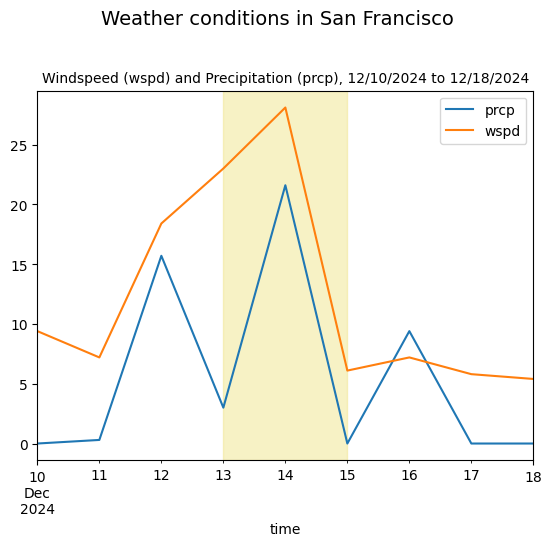

In [ ]:
#@title Weather in San Francisco
# Set time period to be the week of travel.
start = datetime(2024, 12, 10)
end = datetime(2024, 12, 18)

# Get lat/long coordinates for a given city.
def get_coordinates(city_name):
    geolocator = Nominatim(user_agent="my_geocoder")
    location = geolocator.geocode(city_name)
    if location:
        return location.latitude, location.longitude
    else:
        return None, None

# Create Point for San Francisco, CA.
san_francisco = get_coordinates("San Francisco")
location = Point(san_francisco[0], san_francisco[1], 70)

data = Daily(location, start, end)
data = data.fetch()

# Plot line chart including average, minimum and maximum temperature
data.plot(y=['prcp', 'wspd']) # Other useful ones are tmin, tmax, tavg, wpgt for gusts

# Add a title for "Weather conditions in San Francisco".
plt.suptitle("Weather conditions in San Francisco", y=1.05, fontsize=14)
plt.title('Windspeed (wspd) and Precipitation (prcp), 12/10/2024 to 12/18/2024', fontsize=10)
plt.axvspan(datetime(2024, 12, 13), datetime(2024, 12, 15), color='khaki', alpha=0.5)
plt.show()

What was supposed to be a quick layover turned into an unexpected overnight stay at a (somewhat terrifying 😓) 2-star hotel close to the airport. But it was an opportunity to quickly grab Ecuadorian food - and I even got to meet an Argentinian Olympic skier, who got rerouted to the same hotel!

As you can see on the map, it's quite a distance from San Francisco to Buenos Aires, a whopping 6,450 miles!

In [ ]:
# Create a function that calculates the number of miles between two cities.
def calculate_distance(city1, city2):
    """Calculates the distance between two cities using their coordinates.

    Args:
        city1: A tuple representing the latitude and longitude of the first city.
        city2: A tuple representing the latitude and longitude of the second city.

    Returns:
        The distance between the two cities in miles.
    """
    return geodesic(city1, city2).miles

distance_sfo_iah = calculate_distance(locations["SFO"], locations["IAH"])
distance_iah_eze = calculate_distance(locations["IAH"], locations["EZE"])
distance_sfo_eze = calculate_distance(locations["SFO"], locations["EZE"])

print(f"Distance between SFO and IAH: {distance_sfo_iah:.2f} miles")
print(f"Distance between IAH and EZE: {distance_iah_eze:.2f} miles")
print(f"Distance between SFO and EZE: {distance_sfo_eze:.2f} miles")

Distance between SFO and IAH: 1635.51 miles
Distance between IAH and EZE: 5062.48 miles
Distance between SFO and EZE: 6450.85 miles


The flight path took us down south, over Central America and a lot of ocean, and we even got a little close to a big storm over the Gulf of Mexico. And those delays? Well, they were pretty significant, as shown in the bar chart below.

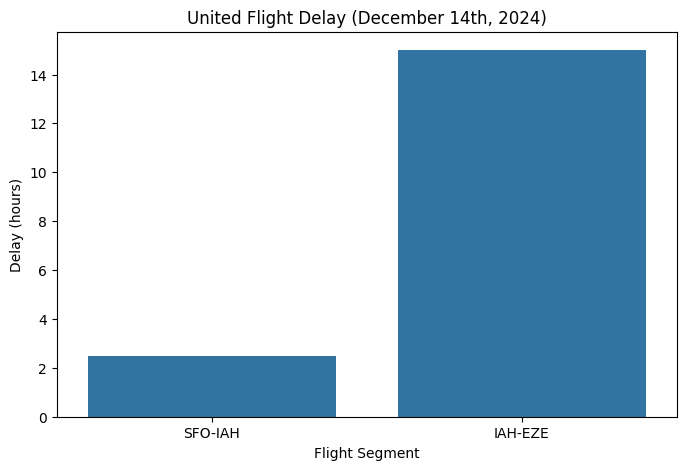

In [ ]:
#@title Delays from SF to Buenos Aires
delay_data = pd.DataFrame({
    'Flight Segment': ['SFO-IAH', 'IAH-EZE'],
    'Scheduled Departure': ['2024-12-14 11:20', '2024-12-14 16:30'],  # Example times
    'Actual Departure': ['2023-12-14 13:40', '2023-12-15 07:00'],  # Example times
    'Delay (hours)': [2.5, 15]
})

# Convert times to datetime objects for better visualization
delay_data['Scheduled Departure'] = pd.to_datetime(delay_data['Scheduled Departure'])
delay_data['Actual Departure'] = pd.to_datetime(delay_data['Actual Departure'])

# Bar chart of delays
plt.figure(figsize=(8, 5))
sns.barplot(x='Flight Segment', y='Delay (hours)', data=delay_data)
plt.title('United Flight Delay (December 14th, 2024)')
plt.ylabel('Delay (hours)')
plt.show()

Let's just say I got very familiar with the Houston and San Francisco airports!

This also gave a bit of time to experiment with some of the newly-released Gemini 2.0 capabilities, including:

* A real-time travel narration companion

* A "this day in history" explorer, for any spot in Google Maps

* A helpful companion for citizen science projects

* Using Gemini 2.0 + JSFiddle to create full web applications

In [ ]:
#@title Weather in Punta del Este
# Set time period to be the month of travel.
start = datetime(2024, 12, 1)
end = datetime(2024, 12, 31)

# Create Point for Punta del Este, Uruguay.
punta_del_este = get_coordinates("Punta del Este")
location = Point(punta_del_este[0], punta_del_este[1], 70)

data = Daily(location, start, end)
data = data.fetch()

# Plot line chart including average, minimum and maximum temperature
data.plot(y=['tavg', 'tmin', 'tmax']) # Other useful ones are tmin, tmax, tavg, wpgt for gusts

# Add a title for "Weather conditions in Punta del Este, Uruguay".
plt.suptitle("Temperature in Punta del Este, Uruguay", y=1.05, fontsize=14)
plt.title('Temperature (min, max, and average) - 12/01/2024 to 12/31/2024', fontsize=10)
plt.axvspan(datetime(2024, 12, 9), datetime(2024, 12, 14), color='khaki', alpha=0.5, label='Data Missing')
plt.axvspan(datetime(2024, 12, 17), datetime(2024, 12, 18), color='red', alpha=0.5, label='Oosterdam!')

# Improve the design of the plot, and make the font look more sleek and well-designed.
# Change the font.
plt.rcParams["font.family"] = "sans-serif"
plt.rcParams["font.sans-serif"] = ["Nimbus Sans"]
plt.xticks(rotation=45)
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.show()

This also gave a bit of time to experiment with some of the newly-released Gemini 2.0 capabilities, including:
* A real-time travel narration companion
* A "this day in history" explorer, for any spot in Google Maps
* A helpful companion for citizen science projects
* Using Gemini 2.0 + JSFiddle to create full web applications

In [ ]:
%%html
<blockquote class="twitter-tweet"><p lang="en" dir="ltr">🏞️🌲 Gemini 2.0 is the best tour guide!<br><br>Check out this virtual walk through the <a href="https://twitter.com/presidiosf?ref_src=twsrc%5Etfw">@presidiosf</a> - which includes a detailed history lesson that even entertains my side quests. 😁<br><br>Camera feed + grounding in <a href="https://twitter.com/Google?ref_src=twsrc%5Etfw">@Google</a> Search + function calling (to get geolocation) = game-changer. <a href="https://t.co/rfVa9dQCAU">pic.twitter.com/rfVa9dQCAU</a></p>&mdash; 👩‍💻 Paige Bailey (@DynamicWebPaige) <a href="https://twitter.com/DynamicWebPaige/status/1867831453230542977?ref_src=twsrc%5Etfw">December 14, 2024</a></blockquote> <script async src="https://platform.twitter.com/widgets.js" charset="utf-8"></script>
<blockquote class="twitter-tweet"><p lang="en" dir="ltr">🤩 Gemini + Search can also do geolocation-aware This Day in History!<br><br>Check out this example, where Gemini knew today&#39;s date (12/14), recognized the neighborhood I was walking through, and mentioned that today in 1903, the Wright Brothers flew their plane for the first time.✈️ <a href="https://t.co/itAFzl0oCs">https://t.co/itAFzl0oCs</a> <a href="https://t.co/O4WDMWku04">pic.twitter.com/O4WDMWku04</a></p>&mdash; 👩‍💻 Paige Bailey (@DynamicWebPaige) <a href="https://twitter.com/DynamicWebPaige/status/1868019292039758038?ref_src=twsrc%5Etfw">December 14, 2024</a></blockquote> <script async src="https://platform.twitter.com/widgets.js" charset="utf-8"></script>
<blockquote class="twitter-tweet"><p lang="en" dir="ltr">😁🪄 I&#39;ve been really impressed with how Gemini 2.0 and Gemini Exp 1206 in <a href="https://twitter.com/googleaistudio?ref_src=twsrc%5Etfw">@GoogleAIStudio</a> are improving, RE: building full web applications...<br><br>Example below: <a href="https://twitter.com/wizards_magic?ref_src=twsrc%5Etfw">@wizards_magic</a> marketplace website, visualized using <a href="https://twitter.com/jsfiddle?ref_src=twsrc%5Etfw">@jsfiddle</a>. <a href="https://t.co/035EMs7B9j">pic.twitter.com/035EMs7B9j</a></p>&mdash; 👩‍💻 Paige Bailey (@DynamicWebPaige) <a href="https://twitter.com/DynamicWebPaige/status/1867619033505513511?ref_src=twsrc%5Etfw">December 13, 2024</a></blockquote> <script async src="https://platform.twitter.com/widgets.js" charset="utf-8"></script>
<blockquote class="twitter-tweet"><p lang="en" dir="ltr">👩‍🚀 Tonight, Gemini is helping me with a citizen science project on <a href="https://twitter.com/the_zooniverse?ref_src=twsrc%5Etfw">@the_zooniverse</a> - we&#39;re finding new eclipsing binaries by inspecting &quot;lightcurves&quot;!<br><br>💫 Sometimes the data can be a bit ambiguous, so it&#39;s useful to have an ever-present and knowledgeable second opinion: <a href="https://t.co/wE8pWxGgzv">pic.twitter.com/wE8pWxGgzv</a></p>&mdash; 👩‍💻 Paige Bailey (@DynamicWebPaige) <a href="https://twitter.com/DynamicWebPaige/status/1868161488952885257?ref_src=twsrc%5Etfw">December 15, 2024</a></blockquote> <script async src="https://platform.twitter.com/widgets.js" charset="utf-8"></script>

# Buenos Aires
Finally made it to Buenos Aires! Stepping off the plane, I was immediately hit with that exciting "new city" energy. But first, I had to get to my cruise ship. Now, my Spanish is... well, let's be honest, it's practically non-existent. Thankfully, Google Translate was a lifesaver at the port.

In [ ]:
%%html
<blockquote class="twitter-tweet"><p lang="en" dir="ltr">🙏 Sending a big thank you to the <a href="https://twitter.com/Google?ref_src=twsrc%5Etfw">@Google</a> Translate and <a href="https://twitter.com/GeminiApp?ref_src=twsrc%5Etfw">@GeminiApp</a> teams for navigating me through Buenos Aires these past couple of days! Despite making the mistake of not brushing up on Spanish 😅, I was able to:<br><br>1⃣ Ask a policeman about a military road blockage, and get… <a href="https://t.co/uGpHg4VPap">pic.twitter.com/uGpHg4VPap</a></p>&mdash; 👩‍💻 Paige Bailey (@DynamicWebPaige) <a href="https://twitter.com/DynamicWebPaige/status/1869057010160763317?ref_src=twsrc%5Etfw">December 17, 2024</a></blockquote> <script async src="https://platform.twitter.com/widgets.js" charset="utf-8"></script>

I was able to communicate with the port staff (after some miming and pointing, of course!), and along with a large group of other people, found my way to the ship, even though it was already pretty late.



In [ ]:
%%html
<blockquote class="twitter-tweet"><p lang="en" dir="ltr">If you&#39;re like me and have never been on a cruise ship before, here are a few images that might help you understand the scale.<br><br>(Ex: 🖼️ #3 - that&#39;s a semi truck! 🚛) <a href="https://t.co/LHKGja8XEN">pic.twitter.com/LHKGja8XEN</a></p>&mdash; 👩‍💻 Paige Bailey (@DynamicWebPaige) <a href="https://twitter.com/DynamicWebPaige/status/1868706290740215829?ref_src=twsrc%5Etfw">December 16, 2024</a></blockquote> <script async src="https://platform.twitter.com/widgets.js" charset="utf-8"></script>
<blockquote class="twitter-tweet"><p lang="en" dir="ltr">your girl just landed in Argentina, about to head to Antarctica, and this ship is giving me serious Titanic vibes 🚢🤩<br><br>(unrelated, I also accidentally met an Olympian?! Argentina is the best 🏂) <a href="https://t.co/7m7Lnhd9dC">pic.twitter.com/7m7Lnhd9dC</a></p>&mdash; 👩‍💻 Paige Bailey (@DynamicWebPaige) <a href="https://twitter.com/DynamicWebPaige/status/1868488865218187671?ref_src=twsrc%5Etfw">December 16, 2024</a></blockquote> <script async src="https://platform.twitter.com/widgets.js" charset="utf-8"></script>

I took advantage of my short time in Buenos Aires and visited the Google office, conveniently located near the port and the exclusive Yacht Club Puerto Madero. I even witnessed a military transport near the port – definitely added an unexpected element to the trip.

And the food! The alfajores were as dreamy as everyone said, and my first taste of Argentinian asado was a revelation.

In [ ]:
# Buenos Aires coordinates
buenos_aires = get_coordinates("Buenos Aires")

# Create a base map of Buenos Aires
ba_map = folium.Map(location=buenos_aires, zoom_start=13)

# Add markers for key locations (example)
locations_ba = {
    "Google Office": (-34.5997, -58.3682),  # Approximate - get the exact address
    "Port": (-34.5890, -58.3694),  # Approximate
    "Yacht Club": (-34.5874, -58.3712),  # Approximate
    # Add more locations as needed
}

for name, coord in locations_ba.items():
    folium.Marker(coord, popup=name).add_to(ba_map)

# Add a title for places visited in Buenos Aires.
ba_map.title = "Places visited in Buenos Aires"
ba_map.get_root().html.add_child(folium.Element("<h1>" + ba_map.title + "</h1>"))

# Display the map
ba_map

# A Quick Trip to Montevideo

Next up was a quick trip over to Montevideo, Uruguay. It's just a short cruise from the port of Buenos Aires, and it's definitely worth a visit. One of the most impactful places I went to was the [Museo Andes 1972](https://mandes.uy/). It's a museum dedicated to the incredible story of the Uruguayan rugby team whose plane crashed in the Andes in 1972. The story of their survival is just mind-blowing, and the museum does a great job of honoring their resilience.

I also had a fun experience using [Gemini 2.0 Multimodal Streaming](https://aistudio.google.com) in AI Studio. There were some cool buildings around Montevideo that I couldn't identify – no signs, no plaques, nothing! But with Gemini, which can process information in real time, I was able to learn about them just by showing them to my phone's camera. Pretty neat, right?

In [ ]:
%%html
<blockquote class="twitter-tweet"><p lang="en" dir="ltr">🇺🇾 Gemini 2.0 + Search grounding as a South America travel companion is stellar - especially when encountering buildings with worn, Spanish-only (or non-existent 😅) signs.<br><br>All I have to do is open <a href="https://twitter.com/googleaistudio?ref_src=twsrc%5Etfw">@GoogleAIStudio</a>, point a camera, &amp; start streaming (or upload a camera backlog): <a href="https://t.co/ug1C4UahEV">pic.twitter.com/ug1C4UahEV</a></p>&mdash; 👩‍💻 Paige Bailey (@DynamicWebPaige) <a href="https://twitter.com/DynamicWebPaige/status/1869005259961520281?ref_src=twsrc%5Etfw">December 17, 2024</a></blockquote> <script async src="https://platform.twitter.com/widgets.js" charset="utf-8"></script>

And of course, I couldn't leave Montevideo without visiting a soccer stadium! The atmosphere was electric; Montevideo hosted the first-ever FIFA World Cup in 1930, and the Estadio Centenario was built specifically for that tournament. Uruguay won, beating Argentina 4-2 in the finals.

In [ ]:
# Montevideo coordinates
montevideo = get_coordinates("Montevideo")

# Create a base map of Montevideo
mvd_map = folium.Map(location=montevideo, zoom_start=13)

# Add markers (example)
locations_mvd = {
    "1972 Museum": (-34.9078, -56.1955),  # Approximate
    "Soccer Stadium": (-34.8947, -56.1502),  # Approximate
    # ... add other locations mentioned
}

for name, coord in locations_mvd.items():
    folium.Marker(coord, popup=name).add_to(mvd_map)

# Add a map title.
mvd_map.title = "Places visited in Montevideo"
mvd_map.get_root().html.add_child(folium.Element("<h1>" + mvd_map.title + "</h1>"))

# Display the map
mvd_map

# First cruise day!

Here's where the real adventure begins. After a couple of days exploring on land, it was time to set sail! As you can see on the map, this cruise is taking us from Buenos Aires, all the way around the tip of South America, and eventually, to Antarctica.

In [ ]:
# prompt: Nap a cruise path from Buenos Aires, Argentina, to Montevideo Uruguay.

# Create a map centered between the two cities
cruise_map = folium.Map(location=[-34.75, -57.27], zoom_start=6)

# Add markers for the start and end points
folium.Marker(buenos_aires, popup="Buenos Aires").add_to(cruise_map)
folium.Marker(montevideo, popup="Montevideo").add_to(cruise_map)

# Draw a polyline representing the cruise path
folium.PolyLine([buenos_aires, montevideo], color="red", weight=2.5, opacity=1).add_to(cruise_map)

# Add a title to the map.
cruise_map.title = "Cruise Path: Buenos Aires to Montevideo"
cruise_map.get_root().html.add_child(folium.Element("<h1>" + cruise_map.title + "</h1>"))

# Display the map
cruise_map

We'll be stopping at several ports along the way, including Montevideo (which I just told you about), Punta del Este, Puerto Madryn, and the Falkland Islands, before heading south across the Drake Passage to the Antarctic Peninsula.

In [ ]:
%%html
<blockquote class="twitter-tweet"><p lang="en" dir="ltr">THERE ARE SCIENCE AND CULTURE LECTURES EVERY DAY 🤩 <a href="https://t.co/cbLVujRSOA">pic.twitter.com/cbLVujRSOA</a></p>&mdash; 👩‍💻 Paige Bailey (@DynamicWebPaige) <a href="https://twitter.com/DynamicWebPaige/status/1868730183836221752?ref_src=twsrc%5Etfw">December 16, 2024</a></blockquote> <script async src="https://platform.twitter.com/widgets.js" charset="utf-8"></script>

# Conclusion

From flight delays and language barriers to incredible food and cultural discoveries, this first leg of my trip was a rollercoaster. Buenos Aires and Montevideo were the perfect appetizers for the Antarctic feast to come. Stay tuned for the next installment of my travel log – to Puerto Madryn and the Falkland Islands!

In [ ]:
%%html
<blockquote class="twitter-tweet"><p lang="en" dir="ltr">🚢 shipping* even during a code freeze**<br><br>* physically and metaphorically <br>** and a webpaige@ freeze, this boat is going to Antarctica! 🧊 <a href="https://t.co/WrUkgpw68Q">https://t.co/WrUkgpw68Q</a> <a href="https://t.co/SSWOvw9EEo">pic.twitter.com/SSWOvw9EEo</a></p>&mdash; 👩‍💻 Paige Bailey (@DynamicWebPaige) <a href="https://twitter.com/DynamicWebPaige/status/1868771521390690698?ref_src=twsrc%5Etfw">December 16, 2024</a></blockquote> <script async src="https://platform.twitter.com/widgets.js" charset="utf-8"></script>